In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
mpl.rcParams['text.usetex'] = True
dvals = {"code2vec":r"$\textsc{code2vec}$", 'HCBCX':r"$\textsc{HC(Binary)+CX(Norm)}$",
         "BGCH":r"$\textsc{CharSeq}$", "BGTK":r"$\textsc{TokenSeq}$"}
fvecs = ["BGCH","BGTK","HCBCX","code2vec"]

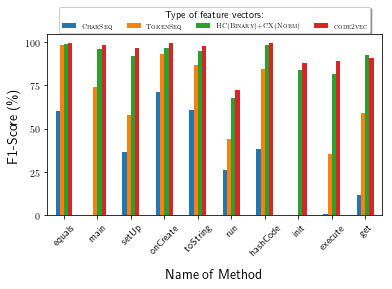

In [3]:
# (a) Barplots over method names.

from functools import reduce

df = pd.read_csv("result.csv", index_col=False, header=None)
df.columns = ["method", "vectors", "acc", "pre", "rec", "f1s"]

def get_f1(df, vec):
    df = df.loc[df['vectors'] == vec]
    df = df[["method", "f1s"]]
    df.columns = ["method", dvals[vec]]
    return df
    
dfs = []
for vec in fvecs:
    tdf = get_f1(df, vec)
    dfs.append(tdf)

mdf = reduce(lambda left,right: pd.merge(left,right,on='method'), dfs)

mdf.set_index(['method'])[mdf.columns.values.tolist()[1:]].plot.bar(rot=45)
plt.xlabel('Name of Method', labelpad=10, fontsize=14)
plt.ylabel('F1-Score (\%)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 101, 25))
plt.legend(loc='upper center', title="Type of feature vectors:", 
           prop={'size': 7}, ncol=4, fancybox=True, shadow=True,
           bbox_to_anchor=(0.5, 1.17))
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig("clfs-bar.jpg", dpi=600)
plt.show()

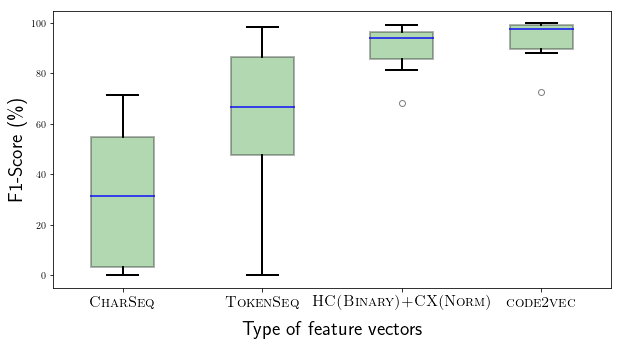

In [4]:
# (b) Boxplots over feature vectors.

df = pd.read_csv("result.csv", index_col=False, header=None)
df.columns = ["method", "vectors", "acc", "pre", "rec", "f1s"]

def get_data(df, vecs):
    data = []
    for vec in vecs:
        d = df.loc[df['vectors'] == vec]["f1s"].tolist()
        data.append(d)
    return data

data = get_data(df, fvecs)

# create boxplot
fig = plt.figure(1, figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True)

# set colors and styles
for box in bp['boxes']:
    box.set(color='black', linewidth=2, alpha=1)
    box.set(facecolor = 'green', alpha=0.3)

for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)

for cap in bp['caps']:
    cap.set(color='black', linewidth=2)

for median in bp['medians']:
    median.set(color='blue', linewidth=2, alpha=0.7)

for flier in bp['fliers']:
    flier.set(marker='o', color='black', alpha=0.5)

# show plot 
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(len(labels)):
    labels[i] = dvals[fvecs[i]]
ax.set_xticklabels(labels, fontsize=15)
plt.xlabel('Type of feature vectors', labelpad=10, fontsize=20)
plt.ylabel('F1-Score (\%)', fontsize=20)
plt.gcf().subplots_adjust(bottom=0.25, top=0.8)
plt.savefig("clfs_boxplot.png", dpi=600)
plt.show() 